In [1]:
import GPy
from cwgp.cwgp import CWGP
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns


kernel = GPy.kern.RBF(1)

for i in range(50, 51, 1):

    d = pd.read_csv('japan3.csv')
    t = d[(d.age <= 80) & (d.year >= 1950) & (d.year <= 2000)]

    model = GPy.models.GPRegression(t[t['age'] == i].year[:, None], t[t['age'] == i].rate[:, None], kernel=kernel)
    model.optimize()
    print(model)
    model.plot(plot_limits=[1940,2030])

    plt.scatter(d[d['age'] == i].year[:, None], d[d['age'] == i].rate[:, None], marker="x", color='black')

    plt.title('Age ' + str(i))
    plt.ylim([0,0.02])
    plt.xlabel('Year')
    plt.ylabel('Mortality Rate')
  
    plt.grid(True)
    plt.show()

## prediction
x_pred = np.linspace(-10, 10, 100)
x_pred = x_pred[:, None]
y_qua_pred = model.predict_quantiles(x_pred, quantiles=(2.5, 50, 97.5))[0]




Name : GP regression
Objective : -328.11399253173914
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |                   value  |  constraints  |  priors
  rbf.variance             |  5.0870266525547854e-05  |      +ve      |        
  rbf.lengthscale          |       8.034301651251498  |      +ve      |        
  Gaussian_noise.variance  |  2.5670891828876565e-08  |      +ve      |        


<Figure size 640x480 with 1 Axes>

In [2]:
a= CWGP("sa",t[t['age'] == i].rate[:, None],transformations=4)
model_c = a.fit()

 /opt/anaconda3/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning:divide by zero encountered in log
 /opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning:invalid value encountered in subtract
 /opt/anaconda3/lib/python3.7/site-packages/numpy/linalg/linalg.py:2125: RuntimeWarning:invalid value encountered in det
 /opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/_numdiff.py:450: RuntimeWarning:invalid value encountered in less
 /opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/_numdiff.py:450: RuntimeWarning:invalid value encountered in greater
 /opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/_numdiff.py:465: RuntimeWarning:invalid value encountered in greater_equal


In [3]:
model_c.x

array([ 5.558571  ,  0.12029731,  4.51424942, -0.58029201,  4.52008498,
       -0.64241223,  4.06008673, -0.49705088])

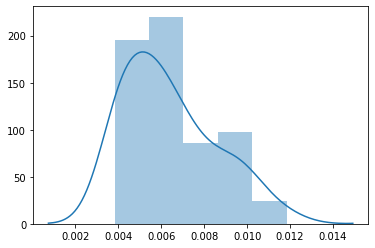

In [4]:
sns.distplot(t[t['age'] == 50].rate[:, None])

In [5]:
transformed_mort, d = a.phi.comp_phi(model_c.x)

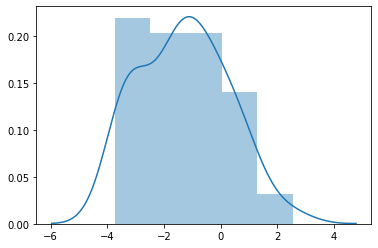

In [6]:
sns.distplot(transformed_mort)


Name : GP regression
Objective : 11.633967341405633
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |                 value  |  constraints  |  priors
  rbf.variance             |     6.044664456458615  |      +ve      |        
  rbf.lengthscale          |     6.813326542870792  |      +ve      |        
  Gaussian_noise.variance  |  0.028400563837888127  |      +ve      |        


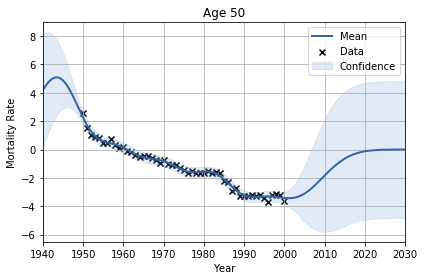

In [7]:
kernel = GPy.kern.RBF(1)

for i in range(50, 51, 1):

    d = pd.read_csv('japan3.csv')
    t = d[(d.age <= 80) & (d.year >= 1950) & (d.year <= 2000)]

    model_cwgp = GPy.models.GPRegression(t[t['age'] == i].year[:, None], transformed_mort, kernel=kernel)
    model_cwgp.optimize()
    print(model_cwgp)
    model_cwgp.plot(plot_limits=[1940,2030])

    plt.title('Age ' + str(i))
    plt.xlabel('Year')
    plt.ylabel('Mortality Rate')
  
    plt.grid(True)
    plt.show()

In [8]:
data = []
for i in range(1940,2030):
    data.append(model_cwgp.predict(np.array(i).reshape(1,-1)))
tr_data = np.array(data).reshape(-1,1,2)
tr_data

array([[[ 4.19916270e+00,  4.09298903e+00]],

       [[ 4.61965526e+00,  3.46701224e+00]],

       [[ 4.92410633e+00,  2.79585040e+00]],

       [[ 5.07908411e+00,  2.12769173e+00]],

       [[ 5.06273699e+00,  1.51349905e+00]],

       [[ 4.86927533e+00,  9.95923852e-01]],

       [[ 4.51139724e+00,  5.99922570e-01]],

       [[ 4.01987509e+00,  3.28507283e-01]],

       [[ 3.44002541e+00,  1.65128252e-01]],

       [[ 2.82543904e+00,  8.14218035e-02]],

       [[ 2.23000069e+00,  4.68947925e-02]],

       [[ 1.69970144e+00,  3.67104853e-02]],

       [[ 1.26589828e+00,  3.52154765e-02]],

       [[ 9.41428684e-01,  3.52152857e-02]],

       [[ 7.20381694e-01,  3.48512410e-02]],

       [[ 5.81499298e-01,  3.43563767e-02]],

       [[ 4.94345075e-01,  3.41014967e-02]],

       [[ 4.26752324e-01,  3.40650461e-02]],

       [[ 3.51817752e-01,  3.40560150e-02]],

       [[ 2.52899390e-01,  3.39839748e-02]],

       [[ 1.25646029e-01,  3.38906907e-02]],

       [[-2.31349464e-02,  3.38372

In [9]:
CI=1.96
mean = tr_data[:,:,0]
var_upper= mean + CI*tr_data[:,:,1]
var_lower= mean - CI*tr_data[:,:,1]

In [10]:
predict_mean = a.phi.inv_comp_phi(model_c.x,mean)
predict_var_upper = a.phi.inv_comp_phi(model_c.x,var_upper)
predict_var_lower = a.phi.inv_comp_phi(model_c.x,var_lower)

In [11]:
np.ravel(predict_var_upper).shape

(90,)

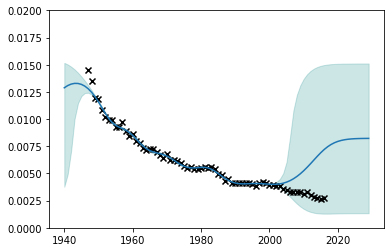

In [12]:
plt.fill_between(np.linspace(1940,2029,90),np.ravel(predict_var_upper),np.ravel(predict_var_lower),color=(0,0.5,0.5,0.2))
plt.scatter(d[d['age'] == 50].year[:, None], d[d['age'] == 50].rate[:, None], marker="x", color='black')
plt.ylim([0,0.02])
plt.plot(np.linspace(1940,2029,90),predict_mean)
